<a href="https://colab.research.google.com/github/Aadi1610/Aadi_Repository/blob/main/Copy_of_Deep_Learning_Coursera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import pathlib

import PIL
from imageio import imread
from skimage.transform import resize

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation,Dropout
from tensorflow.keras.layers import Conv3D, MaxPooling3D,Conv2D, MaxPooling2D, LSTM, GRU
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import optimizers


import os
import datetime
import time
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:

%cd /content/drive/My Drive/archive (1)/

/content/drive/My Drive/archive (1)


In [ ]:

data_dir_covid = pathlib.Path("/content/drive/My Drive/archive (1)/COVID")
data_dir_non_covid = pathlib.Path("/content/drive/My Drive/archive (1)/non-COVID")

In [ ]:
img_count_covid = len(list(data_dir_covid.glob('*.png'))) 
img_count_non_covid = len(list(data_dir_non_covid.glob('*.png'))) 

print("Image count in Covid set: ",img_count_covid)
print("Image count in Non Covid set: ",img_count_non_covid)

Image count in Covid set:  1252
Image count in Non Covid set:  1229


In [ ]:
pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio("/content/drive/My Drive/archive (1)", output="/content/drive/My Drive/Output",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

Copying files: 2481 files [01:00, 40.90 files/s]


In [ ]:
# Define the path for train, validation and test set

data_dir_train = pathlib.Path('/content/drive/My Drive/Output/train')
data_dir_val = pathlib.Path('/content/drive/My Drive/Output/val')
data_dir_test = pathlib.Path('/content/drive/My Drive/Output/test')

In [ ]:
img_count_train = len(list(data_dir_train.glob('*/*.png'))) 
img_count_val = len(list(data_dir_val.glob('*/*.png'))) 
img_count_test = len(list(data_dir_test.glob('*/*.png'))) 

print("Image count in Train set: ",img_count_train)
print("Image count in Val set: ",img_count_val)
print("Image count in Test set: ",img_count_test)

Image count in Train set:  1984
Image count in Val set:  247
Image count in Test set:  250


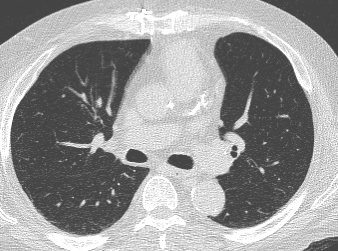

In [ ]:
covid = list(data_dir_train.glob('COVID/*'))
PIL.Image.open(str(covid[0]))

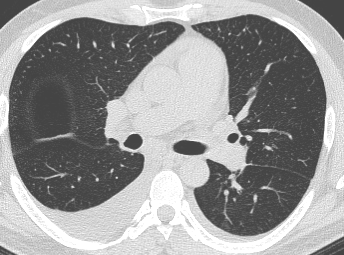

In [ ]:
PIL.Image.open(str(covid[2]))

Image size:  (310, 244)


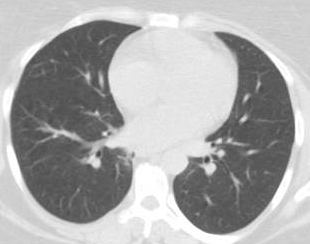

In [ ]:
non_covid = list(data_dir_train.glob('non-COVID/*'))
img1 = PIL.Image.open(str(non_covid[0]))
print("Image size: " ,img1.size)
img1

Image size:  (384, 233)


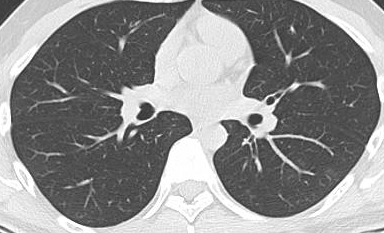

In [ ]:
img2 = PIL.Image.open(str(non_covid[-1]))
print("Image size: " ,img2.size)
img2

In [ ]:
BATCH_SIZE=32
img_height = 256
img_width = 256
num_epochs = 1

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [ ]:
TRAIN_PATH = data_dir_train
TEST_PATH = data_dir_test
VAL_PATH = data_dir_val

In [ ]:
#Image augmentation
trn_datagen = ImageDataGenerator(rescale = 1./255)
tst_datagen = ImageDataGenerator(rescale = 1./255)
#Training data generator
trn_generator = trn_datagen.flow_from_directory(TRAIN_PATH, batch_size=BATCH_SIZE, color_mode="grayscale", shuffle=True, target_size=(128, 128), class_mode='binary')
#Validation data generator
valid_generator = tst_datagen.flow_from_directory(VAL_PATH, batch_size=BATCH_SIZE, class_mode='binary', shuffle=True, target_size=(128, 128), color_mode="grayscale")
tst_generator = tst_datagen.flow_from_directory(TEST_PATH, batch_size=BATCH_SIZE, class_mode='binary', shuffle=False, target_size=(128, 128), color_mode="grayscale")

Found 1984 images belonging to 2 classes.
Found 247 images belonging to 2 classes.
Found 250 images belonging to 2 classes.


In [ ]:
filenames = tst_generator.filenames
nb_samples = len(filenames)

In [ ]:
lmodel = Sequential()
lmodel.add(Conv2D(128,(3, 3), activation='relu', padding="valid", input_shape=(128, 128, 1)))
lmodel.add(MaxPooling2D(pool_size=(2, 2)))
lmodel.add(Conv2D(64,(3, 3), activation='relu', padding="valid"))
lmodel.add(MaxPooling2D(pool_size=(2, 2)))
lmodel.add(Flatten())
lmodel.add(Dense(32, activation='relu'))
lmodel.add(Dropout(0.5))
lmodel.add(Dense(1, activation='sigmoid'))

In [ ]:
lmodel.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])
history = lmodel.fit_generator(trn_generator, verbose=1,
validation_data = valid_generator, epochs=4)

Epoch 1/4
62/62 [==============================] - 145s 2s/step - loss: 0.6144 - accuracy: 0.6951 - val_loss: 0.5875 - val_accuracy: 0.7287
Epoch 2/4
62/62 [==============================] - 145s 2s/step - loss: 0.5880 - accuracy: 0.7087 - val_loss: 0.5740 - val_accuracy: 0.7085
Epoch 3/4
62/62 [==============================] - 145s 2s/step - loss: 0.5695 - accuracy: 0.7193 - val_loss: 0.5320 - val_accuracy: 0.7652
Epoch 4/4
62/62 [==============================] - 149s 2s/step - loss: 0.5424 - accuracy: 0.7409 - val_loss: 0.5308 - val_accuracy: 0.7368


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Accuracy over iterations')

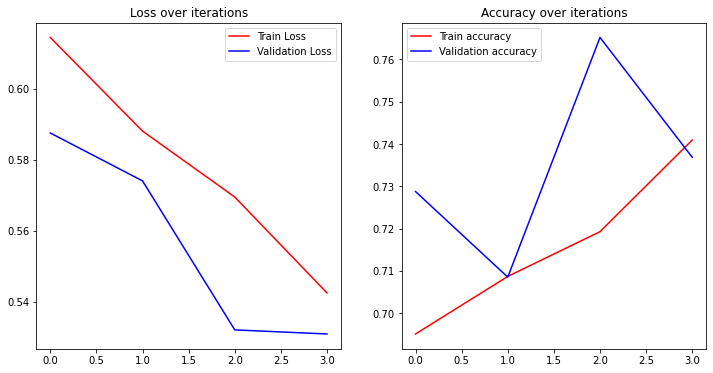

In [ ]:
n = len(history.history["loss"])
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,2,1)
ax.plot(range(n), (history.history["loss"]),'r', label="Train Loss")
ax.plot(range(n), (history.history["val_loss"]),'b', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')
ax = fig.add_subplot(1,2,2)
ax.plot(range(n), (history.history["accuracy"]),'r', label="Train accuracy")
ax.plot(range(n), (history.history["val_accuracy"]),'b', label="Validation accuracy")
ax.legend()
ax.set_title('Accuracy over iterations')

In [ ]:
predics = (lmodel.predict(tst_generator)> 0.5).astype("int32")

In [ ]:
lmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 128)     1280      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 128)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        73792     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 57600)             0         
                                                                 
 dense_1 (Dense)             (None, 32)                1

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc, roc_auc_score
%matplotlib inline

In [ ]:
cm_l = confusion_matrix(tst_generator.classes, predics)
cm_pdl = pd.DataFrame(cm_l , index = ['0','1'] , columns = ['0','1'])

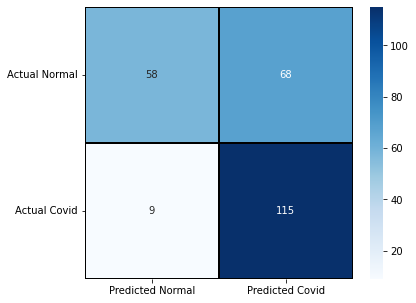

In [ ]:
plt.figure(figsize = (6,5))
sns.heatmap(cm_pdl,cmap= "Blues", linecolor = 'black' ,
linewidth = 1 , annot = True, fmt='',
xticklabels = ['Predicted Normal', 'Predicted Covid'],
yticklabels = ['Actual Normal', 'Actual Covid'])
plt.yticks(rotation=0)
plt.show()

In [ ]:
y_pred_keras1 = lmodel.predict_generator(test_generator)
fpr_kerasl, tpr_kerasl, thresholds_kerasl = roc_curve(tst_generator.classes,y_pred_kerasl)
auc_kerasl = auc(fpr_kerasl, tpr_kerasl)
auc_kerasl

0.8083077316948285

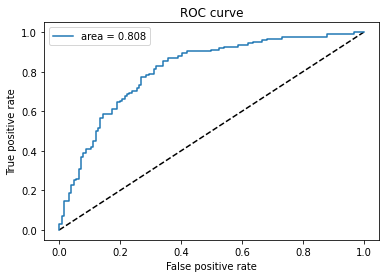

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_kerasl, tpr_kerasl, label='area = {:.3f}'.format(auc_kerasl))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
#Image augmentation
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip=True, rotation_range=5, width_shift_range=0.05, height_shift_range=0.05,shear_range=0.05, zoom_range=0.05)
test_datagen = ImageDataGenerator(rescale = 1./255) 
train_generator = train_datagen.flow_from_directory(TRAIN_PATH, batch_size=BATCH_SIZE, color_mode="grayscale", shuffle=True, target_size=(128, 128), class_mode='binary')

#Validation data generator
validation_generator = test_datagen.flow_from_directory(VAL_PATH, batch_size=BATCH_SIZE, class_mode='binary', shuffle=True, target_size=(128, 128), color_mode="grayscale")
test_generator = test_datagen.flow_from_directory(TEST_PATH, batch_size=BATCH_SIZE, class_mode='binary', shuffle=False, target_size=(128, 128), color_mode="grayscale")

Found 1984 images belonging to 2 classes.
Found 247 images belonging to 2 classes.
Found 250 images belonging to 2 classes.


In [ ]:
print(train_generator.class_indices)
print(test_generator.class_indices)

{'COVID': 0, 'non-COVID': 1}
{'COVID': 0, 'non-COVID': 1}


In [ ]:
model = Sequential()
model.add(Conv2D(128,(3, 3), activation='relu', padding="valid",input_shape=(128, 128, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,(3, 3), activation='relu', padding="valid"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
!pip install visualkeras

     |████████████████████████████████| 992 kB 5.5 MB/s 


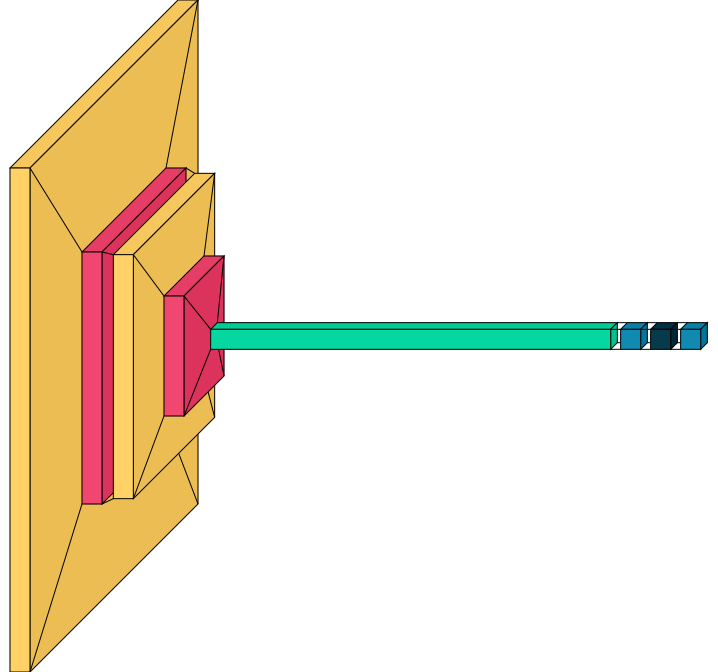

In [ ]:
import visualkeras
visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show
visualkeras.layered_view(model)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 126, 126, 128)     1280      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 61, 61, 64)        73792     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 57600)             0         
                                                                 
 dense_3 (Dense)             (None, 32)               

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])
history = model.fit_generator(train_generator,
verbose=1,
validation_data = validation_generator, epochs=4)

Epoch 1/4
62/62 [==============================] - 161s 3s/step - loss: 0.6890 - accuracy: 0.5383 - val_loss: 0.6775 - val_accuracy: 0.5101
Epoch 2/4
62/62 [==============================] - 163s 3s/step - loss: 0.6764 - accuracy: 0.5801 - val_loss: 0.6622 - val_accuracy: 0.6599
Epoch 3/4
62/62 [==============================] - 170s 3s/step - loss: 0.6609 - accuracy: 0.6164 - val_loss: 0.6408 - val_accuracy: 0.7166
Epoch 4/4
62/62 [==============================] - 150s 2s/step - loss: 0.6426 - accuracy: 0.6381 - val_loss: 0.6222 - val_accuracy: 0.7206


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Accuracy over iterations')

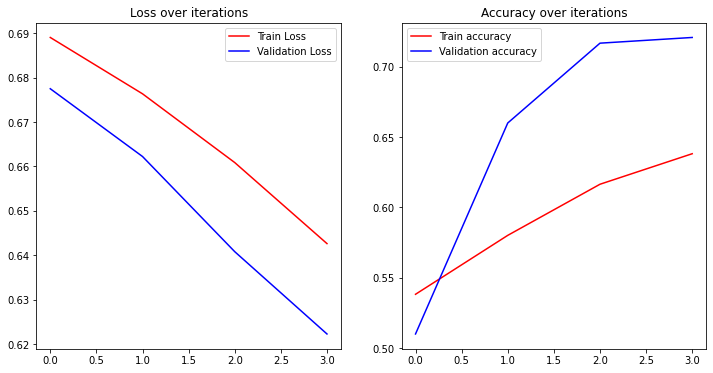

In [ ]:
n = len(history.history["loss"])
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,2,1)
ax.plot(range(n), (history.history["loss"]),'r', label="Train Loss")
ax.plot(range(n), (history.history["val_loss"]),'b', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')
ax = fig.add_subplot(1,2,2)
ax.plot(range(n), (history.history["accuracy"]),'r', label="Train accuracy")
ax.plot(range(n), (history.history["val_accuracy"]),'b', label="Validation accuracy")
ax.legend()
ax.set_title('Accuracy over iterations')

In [ ]:
predictions = (model.predict(test_generator)> 0.5).astype("int32")

In [ ]:
cm = confusion_matrix(test_generator.classes, predictions)
cm_pd = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

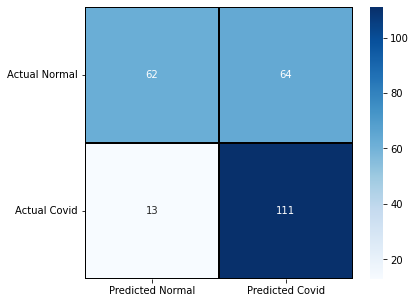

In [ ]:
plt.figure(figsize = (6,5))
sns.heatmap(cm_pd,cmap= "Blues", linecolor = 'black' ,
linewidth = 1 , annot = True, fmt='',
xticklabels = ['Predicted Normal', 'Predicted Covid'],
yticklabels = ['Actual Normal', 'Actual Covid'])
plt.yticks(rotation=0)
plt.show()

In [ ]:
y_pred_keras = model.predict_generator(test_generator)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_generator.classes,y_pred_keras)
auc_keras = auc(fpr_kerasl, tpr_kerasl)
auc_keras

0.8083077316948285

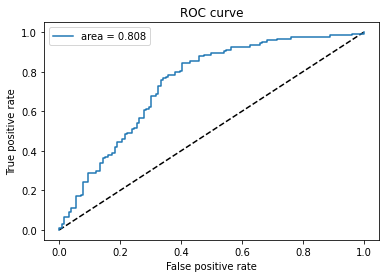

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='area = {:.3f}'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf 


In [ ]:
tf.keras.applications.vgg16.VGG16(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

553476096/553467096 [==============================] - 6s 0us/step


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
base = VGG16(weights = 'imagenet', include_top = False, input_shape = (128, 128, 3))
for layer in base.layers:
  layer.trainable = False

vgg_model = Sequential()
vgg_model.add(base)

vgg_model.add(Dense(256, activation='relu'))
vgg_model.add(Dropout(0.5))
vgg_model.add(Flatten())
vgg_model.add(Dense(128, activation='relu'))
vgg_model.add(Dropout(0.5))
vgg_model.add(Dense(1, activation='sigmoid'))

vgg_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 dense_17 (Dense)            (None, 4, 4, 256)         131328    
                                                                 
 dropout_10 (Dropout)        (None, 4, 4, 256)         0         
                                                                 
 flatten_7 (Flatten)         (None, 4096)              0         
                                                                 
 dense_18 (Dense)            (None, 128)               524416    
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 1)                

In [ ]:
#Image augmentation
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip=True, rotation_range=5,width_shift_range=0.05, height_shift_range=0.05, shear_range=0.05,zoom_range=0.05)
test_datagen_vgg16 = ImageDataGenerator(rescale = 1./255)

#Training data generator
train_generator_vgg16 = train_datagen.flow_from_directory(TRAIN_PATH, batch_size=BATCH_SIZE, shuffle=True, target_size=(128, 128),class_mode='binary')

#Validation data generator
validation_generator_vgg16 = test_datagen_vgg16.flow_from_directory(VAL_PATH,batch_size=BATCH_SIZE, class_mode='binary', shuffle=True,target_size=(128, 128))
test_generator_vgg16 = test_datagen_vgg16.flow_from_directory(TEST_PATH,batch_size=BATCH_SIZE, class_mode='binary', shuffle=False, target_size=(128, 128))

Found 1984 images belonging to 2 classes.
Found 247 images belonging to 2 classes.
Found 250 images belonging to 2 classes.


In [ ]:
vgg_model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])
history = vgg_model.fit_generator(train_generator_vgg16, verbose=1, validation_data = validation_generator_vgg16, epochs=4)

Epoch 1/4
62/62 [==============================] - 387s 6s/step - loss: 0.7745 - accuracy: 0.5353 - val_loss: 0.6494 - val_accuracy: 0.6113
Epoch 2/4
62/62 [==============================] - 379s 6s/step - loss: 0.7194 - accuracy: 0.5685 - val_loss: 0.6424 - val_accuracy: 0.5992
Epoch 3/4
62/62 [==============================] - 378s 6s/step - loss: 0.6918 - accuracy: 0.5963 - val_loss: 0.6256 - val_accuracy: 0.6275
Epoch 4/4
62/62 [==============================] - 378s 6s/step - loss: 0.6567 - accuracy: 0.6028 - val_loss: 0.5878 - val_accuracy: 0.7045


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Accuracy over iterations')

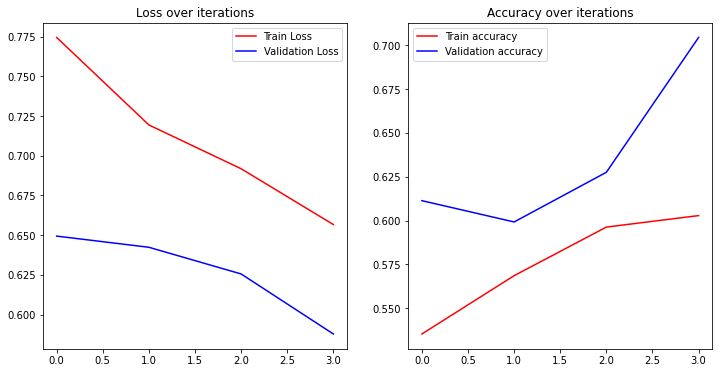

In [ ]:
n = len(history.history["loss"])
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,2,1)
ax.plot(range(n), (history.history["loss"]),'r', label="Train Loss")
ax.plot(range(n), (history.history["val_loss"]),'b', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')
ax = fig.add_subplot(1,2,2)
ax.plot(range(n), (history.history["accuracy"]),'r', label="Train accuracy")
ax.plot(range(n), (history.history["val_accuracy"]),'b', label="Validation accuracy")
ax.legend()
ax.set_title('Accuracy over iterations')

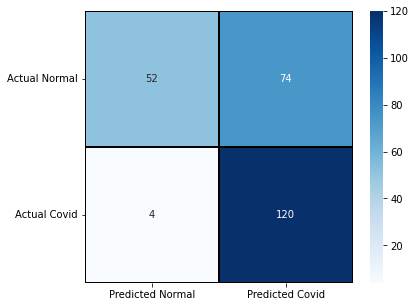

In [ ]:
vgg16_predictions = (vgg_model.predict(test_generator_vgg16)> 0.5).astype("int32")

cm_16 = confusion_matrix(test_generator_vgg16.classes, vgg16_predictions)
cm_pd16 = pd.DataFrame(cm_16 , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (6,5))
sns.heatmap(cm_pd16,cmap= "Blues", linecolor = 'black' ,
linewidth = 1 , annot = True, fmt='',
xticklabels = ['Predicted Normal', 'Predicted Covid'],
yticklabels = ['Actual Normal', 'Actual Covid'])
plt.yticks(rotation=0)
plt.show()

In [ ]:
y_pred_keras_vgg = vgg_model.predict_generator(test_generator_vgg16)
fpr_keras_vgg, tpr_keras_vgg, thresholds_keras_vgg = roc_curve(test_generator_vgg16.classes, y_pred_keras_vgg)
auc_keras_vgg = auc(fpr_keras_vgg, tpr_keras_vgg)
auc_keras_vgg

0.8179723502304148

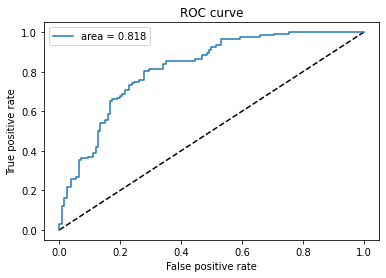

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_vgg, tpr_keras_vgg, label='area = {:.3f}'.format(auc_keras_vgg))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# New Section